# this figure is no longer used.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
from astropy.cosmology import Planck18 as cosmos
import astropy.units as u

In [2]:
def read_wp(file_path):
    table_names = [
        '1h_cs', '1h_ss',               # this is N_massbin * N_rpbin
        '2h_cc', '2h_ss', '2h_cs',      # this is N_massbin * N_massbin * N_rpbin; Note that cs[i,j] = sc[j,i], cc[i,j] = cc[j,i]
        'cm', 'sm'                      # this is N_massbin * N_rpbin
    ]
    table = {k: np.load(path.join(file_path, f'{k}_wp.npy')) for k in table_names}
    table['rp'] = np.load(path.join(file_path, 'rp.npy'))
    return table

In [3]:
func = np.load('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/mcmc/python/halo_mass_function.npy')
wp_dict = read_wp('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/mcmc/python/wp_table/')
# wp_dict = read_wp('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/mcmc/python/wp_table_remake/')

In [4]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 15

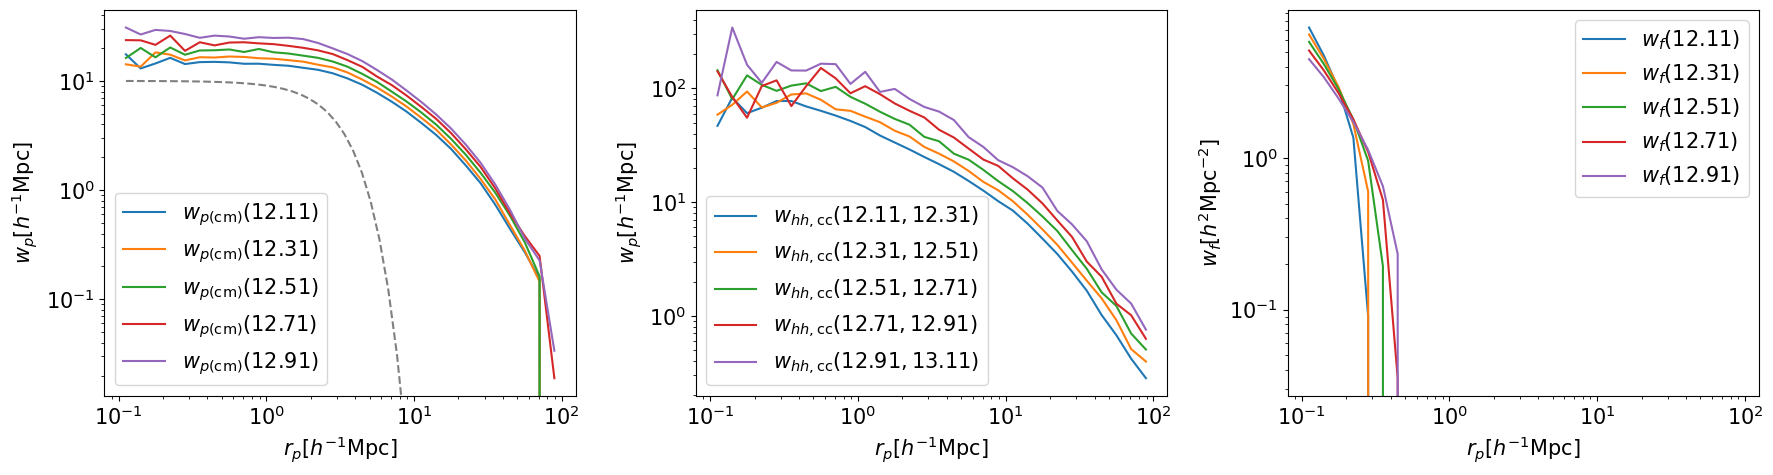

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i in range(30, 71, 10):
    axes[0].plot(wp_dict['rp'], wp_dict['cm'][i], label=r'$w_{{p(\text{{cm}})}}({:g})$'.format(func['Mass'][i]))
axes[0].loglog()
axes[0].legend()
axes[0].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
axes[0].set_ylabel(r'$w_p[h^{-1}\mathrm{Mpc}]$')

r_pp = np.geomspace(wp_dict['rp'][0], wp_dict['rp'][-1], 50)

zbar = np.load(f'../catalogue/quasar_lss_all.npy')['z'].mean()
fwhm1 = cosmos.comoving_distance(zbar).to('Mpc').value*(6*u.arcmin).to('rad').value*cosmos.h     # h^-1 Mpc
sigma1 = fwhm1 / np.sqrt(8*np.log(2))

tmp_lim = axes[0].get_ylim()
axes[0].plot(r_pp, np.exp(-r_pp*r_pp/(2*sigma1*sigma1))*10, '--', color='grey')
axes[0].set_ylim(tmp_lim)


for i in range(30, 71, 10):
    axes[1].plot(wp_dict['rp'], wp_dict['2h_cc'][i, i+10], label=r'$w_{{hh,\mathrm{{cc}}}}({:g},{:g})$'.format(func['Mass'][i], func['Mass'][i+10]))
axes[1].loglog()
axes[1].legend()
axes[1].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
axes[1].set_ylabel(r'$w_p[h^{-1}\mathrm{Mpc}]$')

for i in range(30, 71, 10):
    axes[2].plot(wp_dict['rp'], wp_dict['1h_cs'][i], label=r'$w_{{f}}({:g})$'.format(func['Mass'][i], func['Mass'][i+10]))
axes[2].loglog()
axes[2].legend()
axes[2].set_xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
axes[2].set_ylabel(r'$w_f[h^2\mathrm{Mpc}^{-2}]$')

plt.tight_layout()

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/wp table.pdf')